In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label: 74')

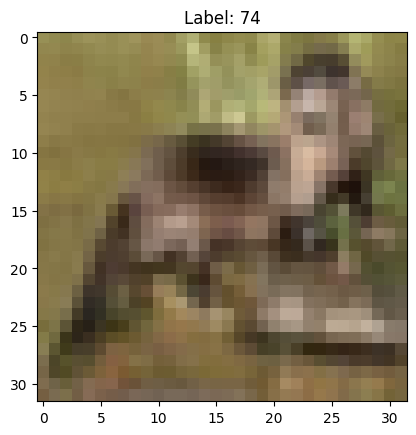

In [6]:
plt.imshow(x_train[100])
plt.title(f"Label: {y_train[20][0]}")

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [15]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(100, activation='softmax')

])

In [17]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy
model.compile(optimizer='adam',  # or optimizer=Adam(learning_rate=0.01) without config parameters
              loss='categorical_crossentropy',
              metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

In [23]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [24]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.3040 - loss: 2.7450 - top_k_categorical_accuracy: 0.6178 - val_accuracy: 0.3514 - val_loss: 2.5545 - val_top_k_categorical_accuracy: 0.6609
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 72ms/step - accuracy: 0.3359 - loss: 2.5549 - top_k_categorical_accuracy: 0.6671 - val_accuracy: 0.3708 - val_loss: 2.4295 - val_top_k_categorical_accuracy: 0.6856
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.3722 - loss: 2.4102 - top_k_categorical_accuracy: 0.6893 - val_accuracy: 0.4080 - val_loss: 2.2693 - val_top_k_categorical_accuracy: 0.7206
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.4006 - loss: 2.2554 - top_k_categorical_accuracy: 0.7271 - val_accuracy: 0.3764 - val_loss: 2.3999 - val_top_k_categorical_accuracy: 0.6925
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4271 - loss: 2.1434 - top_k_categorical_accuracy: 0.7482 - val_accuracy: 0.4237 - val_loss: 2.2079 -

In [26]:
results = model.evaluate(x_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test top-5 accuracy:", results[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4591 - loss: 2.1410 - top_k_categorical_accuracy: 0.7482
Test loss: 2.1526501178741455
Test accuracy: 0.4521999955177307
Test top-5 accuracy: 0.7454000115394592
